## ***Visión por Computadora - 2024***
### *Lista 01 - Ejercicio 5*

Stefano Aragoni, Carol Arévalo, José González, Luis Santos

-----------



2. Tomar dos fotos de una misma escena pero con diferentes iluminaciones. Leer las imágenes correspondientes en Python y hacer lo siguiente:

    1. Construir en ambos casos los histogramas normalizados R,G,B (puede usar los 256 bines, u otra cantidad, por ejemplo 16 bines por cada canal de color).

    2. Proponer una distancia que permita comparar dos histogramas.

    3. Comparar las distancias obtenidas entre las dos fotos tomadas, y otras fotos de su elección, no relacionadas con sus fotos. Evaluar por ejemplo la distribución de las distancias obtenidas.

    4. Ahora, convertir cada imagen RGB a HSV.

    5. Construir esta vez histogramas en H,S (en 2D) y repetir el paso 3

____
#### *Importar librerías*

Como primer paso, se importa numpy, cv2, y matplotlib.

In [65]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

___
#### *Leer las imágenes*

Leer las dos imágenes iguales pero con diferentes ilumainaciones

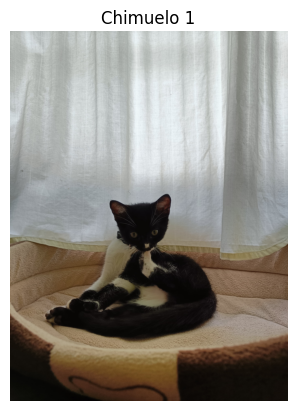

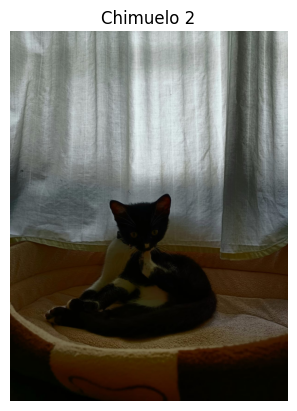

In [66]:
# Leer las imágenes de la carpeta imgs
img_chimuelo = cv2.imread("imgs/img_chimuelo.jpg")
img_chimuelo2 = cv2.imread("imgs/img_chimuelo2.jpg")

# Converit imagen a RGB, porque en OpenCV se lee como BGR
chimuelo1_rgb = cv2.cvtColor(img_chimuelo, cv2.COLOR_BGR2RGB)
chimuelo2_rgb = cv2.cvtColor(img_chimuelo2, cv2.COLOR_BGR2RGB)


plt.imshow(chimuelo1_rgb)
plt.title('Chimuelo 1')
plt.axis('off') 
plt.show()

plt.imshow(chimuelo2_rgb)
plt.title('Chimuelo 2')
plt.axis('off') 
plt.show()


___
#### *Histogramas*

Histogramas normalizados R,G,B de 256 bines. 

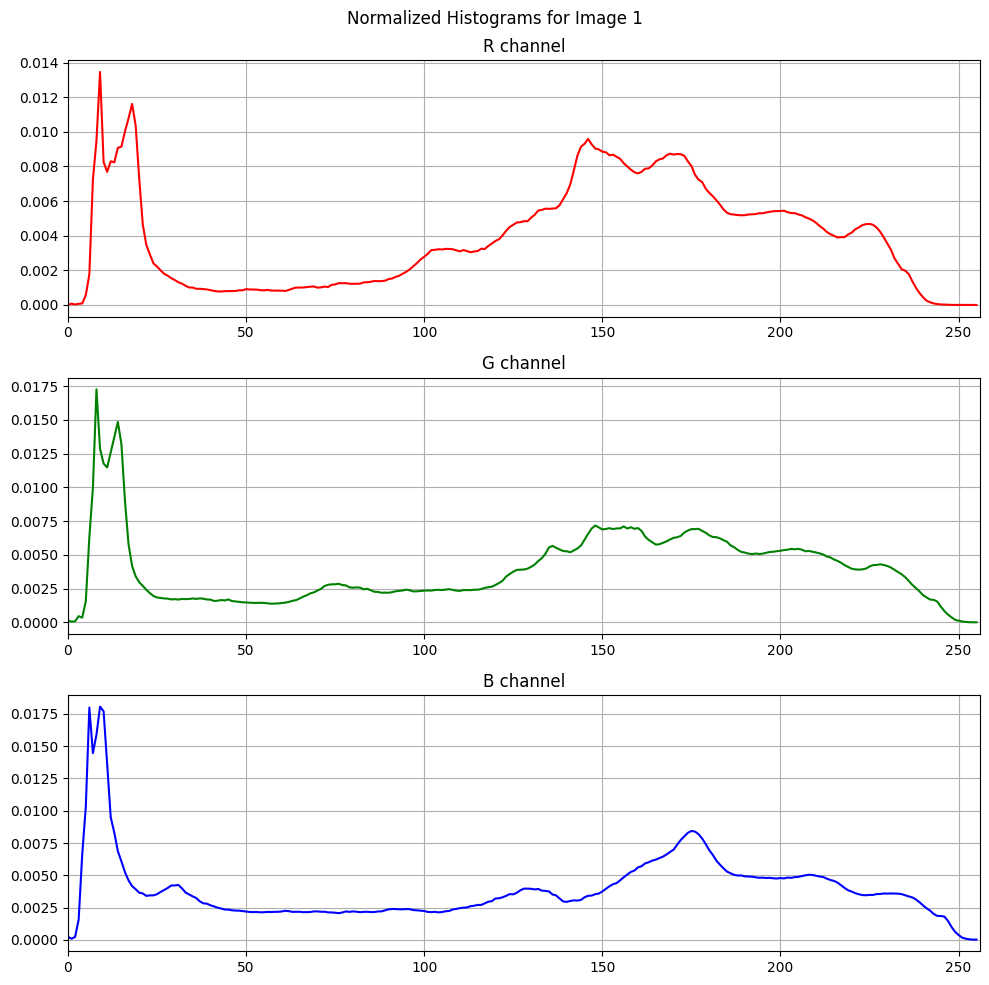

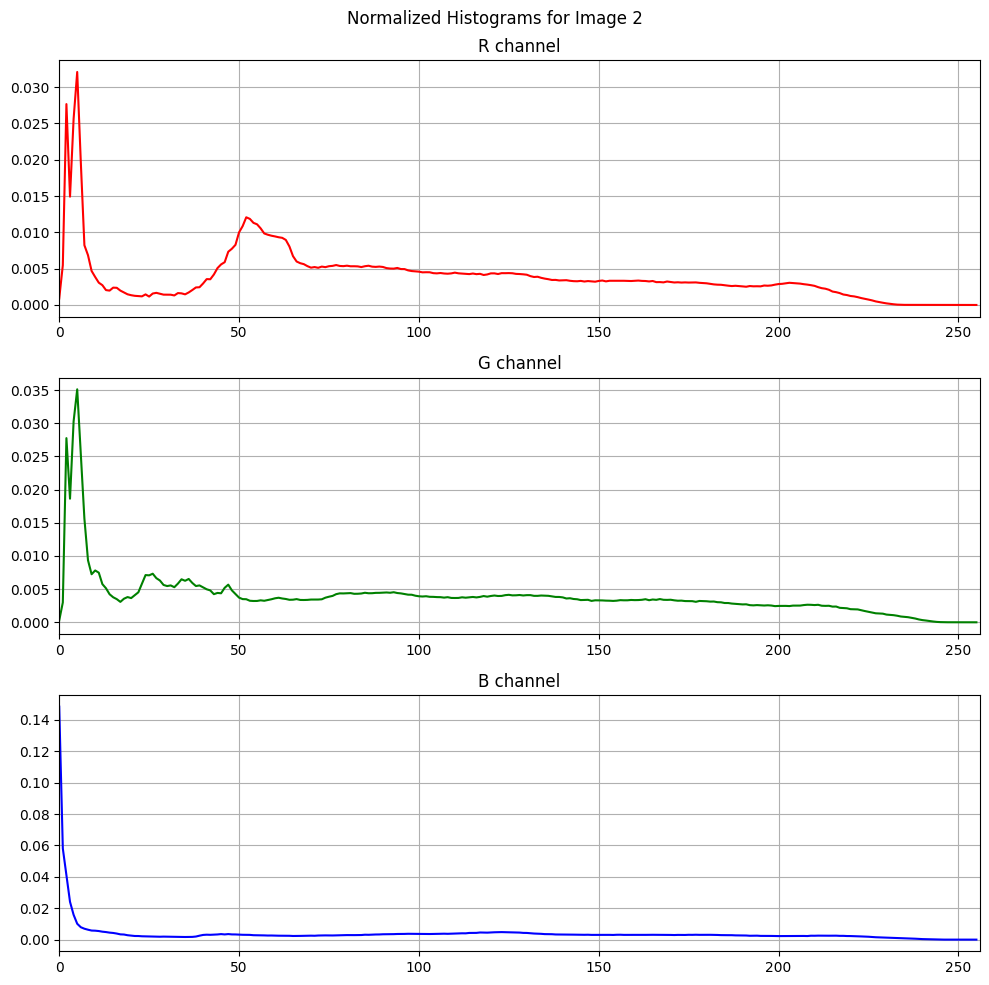

In [67]:
# Funcion para graficar histogramas
def plot_normalized_histograms(image, title):
    # Inicializar la figura
    fig, ax = plt.subplots(3, 1, figsize=(10, 10))
    fig.suptitle(title)

    color = ('r', 'g', 'b')
    # Calcular el histograma para cada canal
    for i, col in enumerate(color):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256]) #imagen, ninguna mascara, 256 bins, 0-256 rango
        # Normalize the histogram
        hist = hist / hist.sum()
        ax[i].plot(hist, color=col)
        ax[i].set_xlim([0, 256])
        ax[i].set_title(f'{col.upper()} channel')
        ax[i].grid(True)

    plt.tight_layout()
    plt.show()


plot_normalized_histograms(chimuelo1_rgb, 'Normalized Histograms for Image 1')
plot_normalized_histograms(chimuelo2_rgb, 'Normalized Histograms for Image 2')


___
#### *Distancia*

Distancia de Chi-cuadrado: Mide la discrepancia entre dos histogramas como la suma de los cuadrados de las diferencias entre los bines correspondientes, dividida por la suma de los histogramas.

1. La distancia Chi-cuadrado entre los histogramas normalizados de las dos imágenes de chimuelo


In [68]:
# Funcion para calcular la distancia Chi-Squared entre dos histogramas
def chi_squared_distance(hist1, hist2):
    # calcular la diancia chi-cuadrada
    return np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-10))


In [69]:
# CaLcular los histogramas normalizados para cada canal en ambas imagenes
hist1_r = cv2.calcHist([chimuelo1_rgb], [0], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,0])
hist1_g = cv2.calcHist([chimuelo1_rgb], [1], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,1])
hist1_b = cv2.calcHist([chimuelo1_rgb], [2], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,2])

hist2_r = cv2.calcHist([chimuelo2_rgb], [0], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,0])
hist2_g = cv2.calcHist([chimuelo2_rgb], [1], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,1])
hist2_b = cv2.calcHist([chimuelo2_rgb], [2], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,2])

# Calcular la distancia Chi-Squared para cada canal
chi_sq_dist_r = chi_squared_distance(hist1_r, hist2_r)
chi_sq_dist_g = chi_squared_distance(hist1_g, hist2_g)
chi_sq_dist_b = chi_squared_distance(hist1_b, hist2_b)

chi_chimuelo2 = chi_sq_dist_r + chi_sq_dist_g + chi_sq_dist_b
chi_chimuelo2

0.01388730051840877

2. La distancia Chi-cuadrado entre los histogramas normalizados entre la primera imágenes de chimuelo y la primera imagen adicional (Gatito 1):

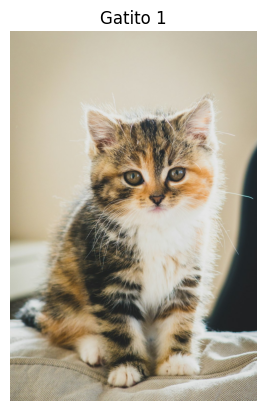

In [70]:
# imagen gatito 1
img_gatito = cv2.imread("imgs/gatito.jpeg")

# Converit imagen a RGB, porque en OpenCV se lee como BGR
img_gatito_rgb = cv2.cvtColor(img_gatito, cv2.COLOR_BGR2RGB)

plt.imshow(img_gatito_rgb)
plt.title('Gatito 1')
plt.axis('off')
plt.show()



In [71]:
# Calcular los histogramas normalizados para cada canal en ambas imagenes
hist_gatito1_r = cv2.calcHist([img_gatito_rgb], [0], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,0])
hist_gatito1_g = cv2.calcHist([img_gatito_rgb], [1], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,1])
hist_gatito1_b = cv2.calcHist([img_gatito_rgb], [2], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,2])

# Calcular la distancia Chi-Squared para cada canal
chi_sq_dist_r = chi_squared_distance(hist1_r, hist_gatito1_r)
chi_sq_dist_g = chi_squared_distance(hist1_g, hist_gatito1_g)
chi_sq_dist_b = chi_squared_distance(hist1_b, hist_gatito1_b)

chi_gatitito2 = chi_sq_dist_r + chi_sq_dist_g + chi_sq_dist_b
chi_gatitito2


0.0086363021880363

3. La distancia Chi-cuadrado entre los histogramas normalizados de la primera imágen y la segunda imagen adicional (Gatito 2):

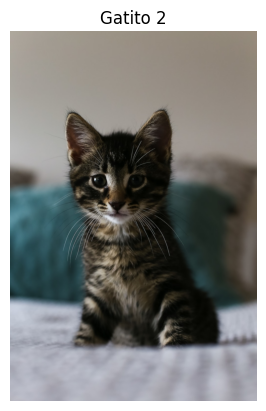

In [72]:
# imagen gatito 2
img_gatito2 = cv2.imread("imgs/gatito2.jpeg")

# Converit imagen a RGB, porque en OpenCV se lee como BGR
img_gatito2_rgb = cv2.cvtColor(img_gatito2, cv2.COLOR_BGR2RGB)

plt.imshow(img_gatito2_rgb)
plt.title('Gatito 2')
plt.axis('off')
plt.show()


In [73]:
# Calcular los histogramas normalizados para cada canal en ambas imagenes
hist_gatito2_r = cv2.calcHist([img_gatito2_rgb], [0], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,0])
hist_gatito2_g = cv2.calcHist([img_gatito2_rgb], [1], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,1])
hist_gatito2_b = cv2.calcHist([img_gatito2_rgb], [2], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,2])

# Calcular la distancia Chi-Squared para cada canal
chi_sq_dist_r = chi_squared_distance(hist1_r, hist_gatito2_r)
chi_sq_dist_g = chi_squared_distance(hist1_g, hist_gatito2_g)
chi_sq_dist_b = chi_squared_distance(hist1_b, hist_gatito2_b)

chi_gatitito1 = chi_sq_dist_r + chi_sq_dist_g + chi_sq_dist_b
chi_gatitito1

0.010133574066692153

Como se puede observar, se obtuvo un chi-cuadrado de 0.01388730051840877 entre la imagen de chimuelo1 y chimuelo2, o que podria significar que las imágenes son parecidas. No obstante al analizar el chi-cuadrado con la imagen del gaito1 y gatito2, siendo estas 0.0086363021880363 y 0.010133574066692153 respectivamente, nos hace dudar si esta distancia es la mejor forma de verificar la similitud de una imágen. Esto pues los resultados indican que las imágenes son parecidas cuando en realidad no lo son. 

En conclusión, lsa distancia Chi-cuadrado, aunque es una herramienta útil para comparar histogramas, puede no ser siempre el mejor indicador de similitud visual entre imágenes,

_____
Distancia Euclidiana:
La distancia euclidiana es otra forma de comparar histogramas de imágenes y puede ofrecer una perspectiva diferente a la distancia Chi-cuadrado. A diferencia de la distancia Chi-cuadrado, que tiene en cuenta la diferencia relativa entre los bines del histograma, la distancia euclidiana mide la distancia "lineal" entre dos puntos (o en este caso, dos histogramas) en un espacio multidimensional


1. La distancia euclidiana entre los histogramas normalizados de las dos imágenes de chimuelo


In [74]:
def euclidian_distance(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))

In [75]:
# Calcular los histogramas normalizados para cada canal en ambas imagenes
hist1_r = cv2.calcHist([chimuelo1_rgb], [0], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,0])
hist1_g = cv2.calcHist([chimuelo1_rgb], [1], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,1])
hist1_b = cv2.calcHist([chimuelo1_rgb], [2], None, [256], [0, 256]) / np.sum(chimuelo1_rgb[:,:,2])

hist2_r = cv2.calcHist([chimuelo2_rgb], [0], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,0])
hist2_g = cv2.calcHist([chimuelo2_rgb], [1], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,1])
hist2_b = cv2.calcHist([chimuelo2_rgb], [2], None, [256], [0, 256]) / np.sum(chimuelo2_rgb[:,:,2])

# Calcular la distancia Euclidiana para cada canal
eucl_dist_r = euclidian_distance(hist1_r, hist2_r)
eucl_dist_g = euclidian_distance(hist1_g, hist2_g)
eucl_dist_b = euclidian_distance(hist1_b, hist2_b)

eucl_chimuelo2 = eucl_dist_r + eucl_dist_g + eucl_dist_b
eucl_chimuelo2

0.0037431404514989552

2. La distancia euclidiana entre los histogramas normalizados entre la primera imágenes de chimuelo y la primera imagen adicional (Gatito 1):

In [76]:
# Calcular los histogramas normalizados para cada canal en ambas imagenes
hist_gatito1_r = cv2.calcHist([img_gatito_rgb], [0], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,0])
hist_gatito1_g = cv2.calcHist([img_gatito_rgb], [1], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,1])
hist_gatito1_b = cv2.calcHist([img_gatito_rgb], [2], None, [256], [0, 256]) / np.sum(img_gatito_rgb[:,:,2])

# Calcular la distancia Euclidiana para cada canal
eucl_dist_r = euclidian_distance(hist1_r, hist_gatito1_r)
eucl_dist_g = euclidian_distance(hist1_g, hist_gatito1_g)
eucl_dist_b = euclidian_distance(hist1_b, hist_gatito1_b)

eucl_gatitito1 = eucl_dist_r + eucl_dist_g + eucl_dist_b
eucl_gatitito1

0.001464045753664357

3. La distancia euclidiana entre los histogramas normalizados de la primera imágen y la segunda imagen adicional (Gatito 2):

In [77]:
# Calcular los histogramas normalizados para cada canal en ambas imagenes
hist_gatito2_r = cv2.calcHist([img_gatito2_rgb], [0], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,0])
hist_gatito2_g = cv2.calcHist([img_gatito2_rgb], [1], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,1])
hist_gatito2_b = cv2.calcHist([img_gatito2_rgb], [2], None, [256], [0, 256]) / np.sum(img_gatito2_rgb[:,:,2])

# Calcular la distancia Euclidiana para cada canal
eucl_dist_r = euclidian_distance(hist1_r, hist_gatito2_r)
eucl_dist_g = euclidian_distance(hist1_g, hist_gatito2_g)
eucl_dist_b = euclidian_distance(hist1_b, hist_gatito2_b)

eucl_gatitito2 = eucl_dist_r + eucl_dist_g + eucl_dist_b
eucl_gatitito2

0.0014536270044321624

A pesar de que se esperaba que la iamgen de chimuelo1 y la imagen de chimuelo2 tuvieron una distancia euclidiana menor, nuvamente no fue el resultado obtenido. Esto puede ser porque los seres humanos perciben diferencias de color de manera no uniforme a lo largo del espectro de colores, mientras que las distancias de histograma tratan todas las diferencias de color por igual.

Para obtener resultados que se alineen más estrechamente con la percepción humana de similitud, podria ser necesario  convertir las imágenes a HSV y analizar los histogramas en este espacio de color. Esto podría proporcionar resultados diferentes. El espacio de color HSV separa la luminosidad del color, lo que puede ser más representativo en ciertos casos para comparar imágenes bajo diferentes condiciones de iluminación.

___
#### *RGB a HSV*

Convertir cada imagen RGB a HSV

In [78]:
# Funcion para convertir una imagen RGB a HSV y calcular histogramas normalizados para H y S
def convert_to_hsv_and_hist(image):
    # Convertir la imagen de RGB a HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    return hsv_image

In [79]:
# Convertir las imagenes originales a HSV
chimuelo1_hsv = convert_to_hsv_and_hist(chimuelo1_rgb)
chimuelo2_hsv= convert_to_hsv_and_hist(chimuelo2_rgb)
gatito1_hsv = convert_to_hsv_and_hist(img_gatito_rgb)
gatito2_hsv = convert_to_hsv_and_hist(img_gatito2_rgb)


___
#### *Histogramas en H,S (2D)*

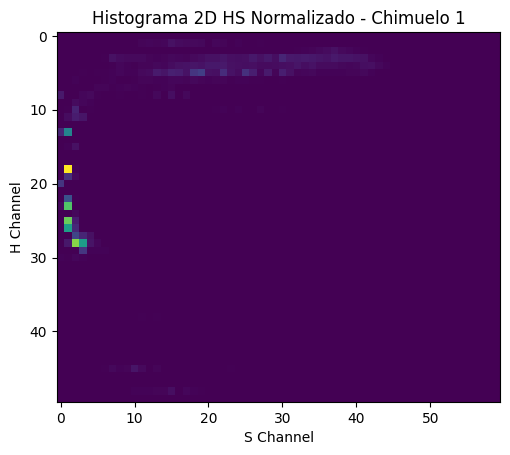

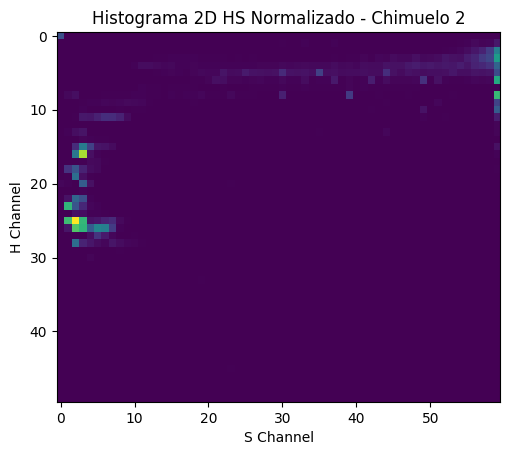

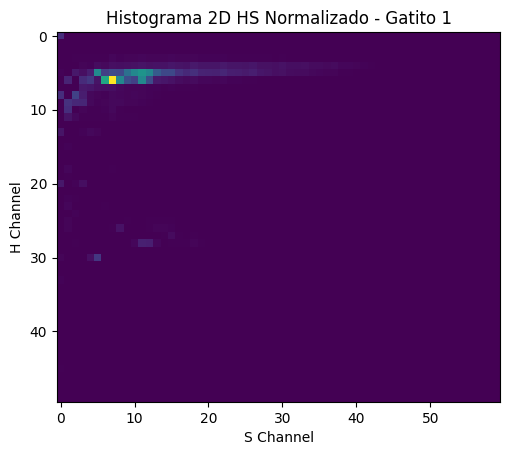

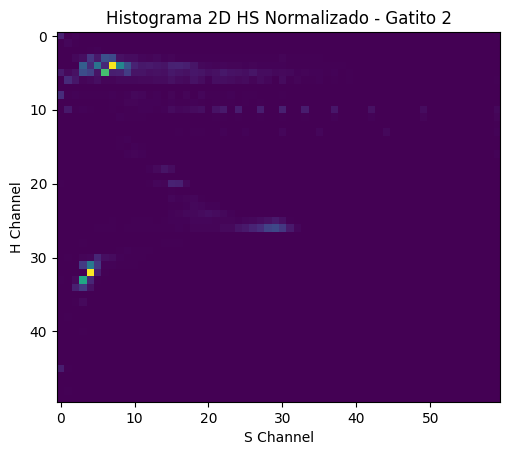

(array([[2.8149286e-04, 0.0000000e+00, 5.5631000e-07, ..., 0.0000000e+00,
         0.0000000e+00, 1.3025601e-04],
        [0.0000000e+00, 1.0331472e-06, 4.3710074e-06, ..., 7.9472862e-08,
         0.0000000e+00, 1.7801920e-05],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.5367432e-07,
         7.9472858e-07, 1.7007193e-05],
        ...,
        [0.0000000e+00, 0.0000000e+00, 1.5894572e-07, ..., 0.0000000e+00,
         0.0000000e+00, 4.7683716e-07],
        [0.0000000e+00, 5.5631000e-07, 1.5735626e-05, ..., 0.0000000e+00,
         0.0000000e+00, 3.2583873e-06],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
         0.0000000e+00, 0.0000000e+00]], dtype=float32),
 array([[1.0209896e-02, 0.0000000e+00, 0.0000000e+00, ..., 1.6145834e-05,
         8.8541665e-06, 1.4947916e-04],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.6666665e-04,
         6.9843751e-04, 2.6770832e-03],
        [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ...,

In [80]:
# Función para calcular y graficar el histograma 2D HS normalizado
def plot_2d_hist_h_s(image_hsv, title):
    # Definir el número de bines para H y S
    h_bins = 50  
    s_bins = 60 
    # Calcular el histograma 2D para los canales H y S
    hist = cv2.calcHist([image_hsv], [0, 1], None, [h_bins, s_bins], [0, 180, 0, 256])
    # Normalizar el histograma para que la suma de todos los bines sea 1
    hist_normalized = hist / hist.sum()
    # Graficar el histograma
    plt.imshow(hist_normalized, interpolation='nearest')
    plt.title(title)
    plt.xlabel('S Channel')
    plt.ylabel('H Channel')
    plt.show()

    return hist_normalized

# Calcular y graficar los histogramas 2D HS normalizados para cada imagen
hist_2d_chimuelo1_normalized = plot_2d_hist_h_s(chimuelo1_hsv, 'Histograma 2D HS Normalizado - Chimuelo 1')
hist_2d_chimuelo2_normalized = plot_2d_hist_h_s(chimuelo2_hsv, 'Histograma 2D HS Normalizado - Chimuelo 2')
hist_2d_gatito1_normalized = plot_2d_hist_h_s(gatito1_hsv, 'Histograma 2D HS Normalizado - Gatito 1')
hist_2d_gatito2_normalized = plot_2d_hist_h_s(gatito2_hsv, 'Histograma 2D HS Normalizado - Gatito 2')

# Devolver los histogramas normalizados como datos, no como imágenes visualizadas
hist_2d_chimuelo1_normalized, hist_2d_chimuelo2_normalized, hist_2d_gatito1_normalized, hist_2d_gatito2_normalized

_____
#### *Distancia HS*
Nuevamente se utiliza ChiCuadrado para comparar las distancias entre las fotos tomadas de chimuelo y las otras dos fotos adiscionales de gatitos, pero esta vez con digramas HS (2D).

In [81]:
# Función para calcular la distancia Chi-cuadrado entre dos histogramas 2D
def chi_squared_distance_2d(hist1, hist2):
    return np.sum(((hist1 - hist2) ** 2) / (hist1 + hist2 + 1e-10))



1. La distancia Chi-cuadrado entre los histogramas normalizados de las dos imágenes de chimuelo


In [82]:
# Calcular la distancia Chi-cuadrado entre los histogramas 2D HS normalizados de las imágenes de Chimuelo
chi_sq_dist_chimuelo1_chimuelo2 = chi_squared_distance_2d(hist_2d_chimuelo1_normalized, hist_2d_chimuelo2_normalized)
chi_sq_dist_chimuelo1_chimuelo2

1.382895

2. La distancia Chi-cuadrado entre los histogramas normalizados entre la primera imágenes de chimuelo y la primera imagen adicional (Gatito 1):

In [83]:
chi_sq_dist_chimuelo1_gatito1 = chi_squared_distance_2d(hist_2d_chimuelo1_normalized, hist_2d_gatito1_normalized)
chi_sq_dist_chimuelo1_gatito1

1.2802793

3. La distancia Chi-cuadrado entre los histogramas normalizados de la primera imágen y la segunda imagen adicional (Gatito 2):

In [84]:
chi_sq_dist_chimuelo1_gatito2 = chi_squared_distance_2d(hist_2d_chimuelo1_normalized, hist_2d_gatito2_normalized)
chi_sq_dist_chimuelo1_gatito2

1.5151883

Estos valores son relativamente cercanos entre sí, lo que podría indicar que las diferencias en la distribución de tonos y saturación no son muy grandes entre las imágenes comparadas. Es importante tener en cuenta que la distancia Chi-cuadrado en este contexto es una medida de la similitud entre los histogramas, y no necesariamente una medida directa de la similitud visual entre las imágenes. ​

____
Se realiza lo mismo pero con las distancia euclidiana

In [85]:
def euclidean_distance(hist1, hist2):
    return np.sqrt(np.sum((hist1 - hist2) ** 2))


1. La distancia euclidiana entre los histogramas normalizados de las dos imágenes de chimuelo


In [86]:
eucl_dist_chimuelo1_chimuelo2 = euclidean_distance(hist_2d_chimuelo1_normalized, hist_2d_chimuelo2_normalized)
eucl_dist_chimuelo1_chimuelo2

0.16326654

2. La distancia euclidiana entre los histogramas normalizados entre la primera imágenes de chimuelo y la primera imagen adicional (Gatito 1):

In [87]:
eucl_dist_chimuelo1_gatito1 = euclidean_distance(hist_2d_chimuelo1_normalized, hist_2d_gatito1_normalized)
eucl_dist_chimuelo1_gatito1

0.19616523

3. La distancia euclidiana entre los histogramas normalizados de la primera imágen y la segunda imagen adicional (Gatito 2):

In [88]:
eucl_dist_chimuelo1_gatito2 = euclidean_distance(hist_2d_chimuelo1_normalized, hist_2d_gatito2_normalized)
eucl_dist_chimuelo1_gatito2

0.19825041

La distancia euclidiana entre los histogramas HS normalizados de las imágenes de Chimuelo 1 y Chimuelo 2 es menor (0.16) en comparación con las distancias calculadas entre Chimuelo 1 y las imágenes de los gatitos (0.20). Esto es consistente con lo que esperaríamos, ya que las imágenes de Chimuelo 1 y Chimuelo 2 son de la misma escena bajo diferentes iluminaciones, por lo que deberían tener una distribución de color más similar entre sí que con imágenes de diferentes escenas.

El hecho de que las distancias entre Chimuelo 1 y las imágenes de los gatitos sean mayores sugiere que hay diferencias más notables en la distribución del color y la saturación entre estas imágenes, lo cual tiene sentido al ser imágenes de diferentes gatos y posiblemente diferentes condiciones de iluminación y fondos.

Sin embargo, el valor absoluto de la distancia euclidiana por sí solo no nos dice cuán "diferentes" son las imágenes en términos de percepción humana. Aunque una distancia menor indica mayor similitud en la distribución del color, la percepción de similitud puede ser afectada por otros factores como la textura, el contexto, y la distribución espacial de los colores, que no son capturados por los histogramas de color. Por lo tanto, aunque las distancias euclidianas proporcionan una medida cuantitativa de similitud, siempre es importante interpretar estos valores en el contexto más amplio de la visión por computadora y la percepción humana.